## Principal Component Analysis

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

### Functions

In [2]:
def cumulativeExplainedVariance(S, k_range):
    
    variance_ratio = np.zeros(k_range) # Cumulative explained variance ratio

    for i in range(k_range):
        variance_ratio[i] = np.sum(S[0:i+1])/np.sum(S)
    
    return variance_ratio

In [3]:
class FeatureNormalize():
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):

        self.mu = np.mean(X, axis=0) # Mean of each feature
        self.sigma = np.std(X, axis=0) # Standard deviation of each feature

        return self
    
    def transform(self, X):
        
        return (X - self.mu) / self.sigma # Normalized data (zero mean and unite standard deviation)

In [4]:
class PCA():
        
    def __init__(self, k):

        self.k = k # Number of principal components
        
    def fit(self, X, y=None):
        
        m = np.size(X, axis=0) # Number of examples
    
        sigma = (1/m)*X.T.dot(X) # Covariance Matrix

        [U, self.S, V] = np.linalg.svd(sigma) # Singular Decomposition Value

        self.Ur = U[:, 0:self.k] # U reduce
        
        return self
    
    def transform(self, X):
        
        Z = X.dot(self.Ur) # Projected data of k-dimensions
        
        return Z

### Iris dataset

In [5]:
iris = datasets.load_iris()

X = iris.data
labels = iris.target

In [6]:
n_features = X.shape[1] # Number of features

print('Number of examples', X.shape[0])
print('Number of features', n_features)
print('Labels:', np.unique(labels))

Number of examples 150
Number of features 4
Labels: [0 1 2]


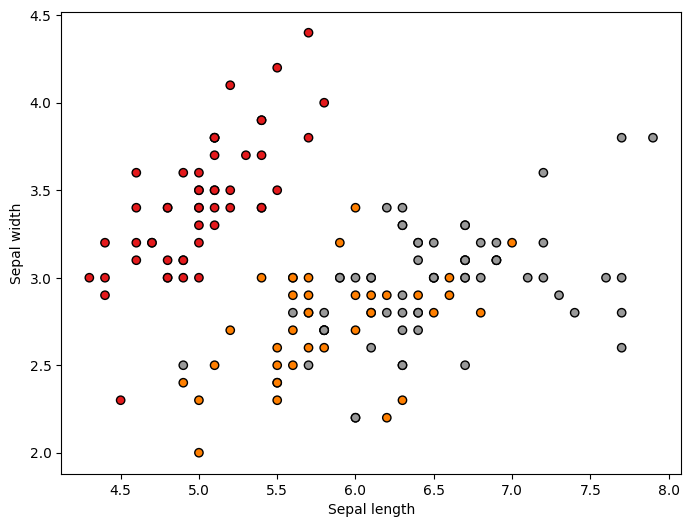

In [7]:
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

In [8]:
k = 3 # Number of components

# Feature normalization
fn = FeatureNormalize()
fn.fit(X)

X_norm = fn.transform(X)

# Principal Component Analysis
pca = PCA(k)
pca.fit(X_norm)

Z = pca.transform(X_norm)
S = pca.S

In [9]:
k_range = n_features-1
variance_ratio = cumulativeExplainedVariance(S, k_range)

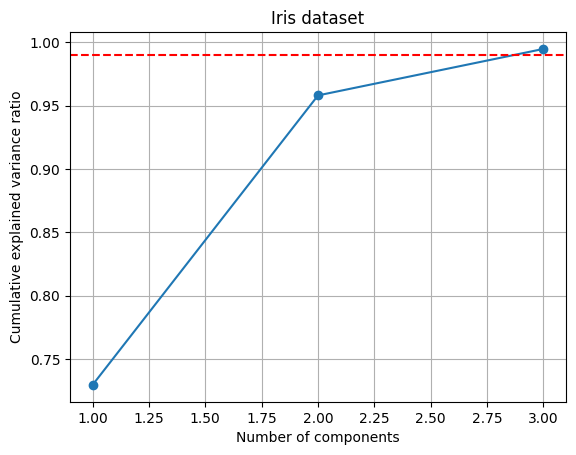

In [10]:
threshold = 0.99 # Threshold of explained variance

n_components = np.arange(1, k+1)

plt.plot(n_components, variance_ratio, marker='o')
plt.axhline(threshold, color='r', linestyle='--')
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Iris dataset')
plt.show()

In [11]:
curr_ratio = variance_ratio[variance_ratio >= threshold][0]
curr_component = n_components[variance_ratio == curr_ratio][0]

print('k = %d is the smallest value of k with cumulative explained variance ratio of %.4f, which is higher than the threshold of %.2f' %
      (curr_component, curr_ratio, threshold))

k = 3 is the smallest value of k with cumulative explained variance ratio of 0.9948, which is higher than the threshold of 0.99


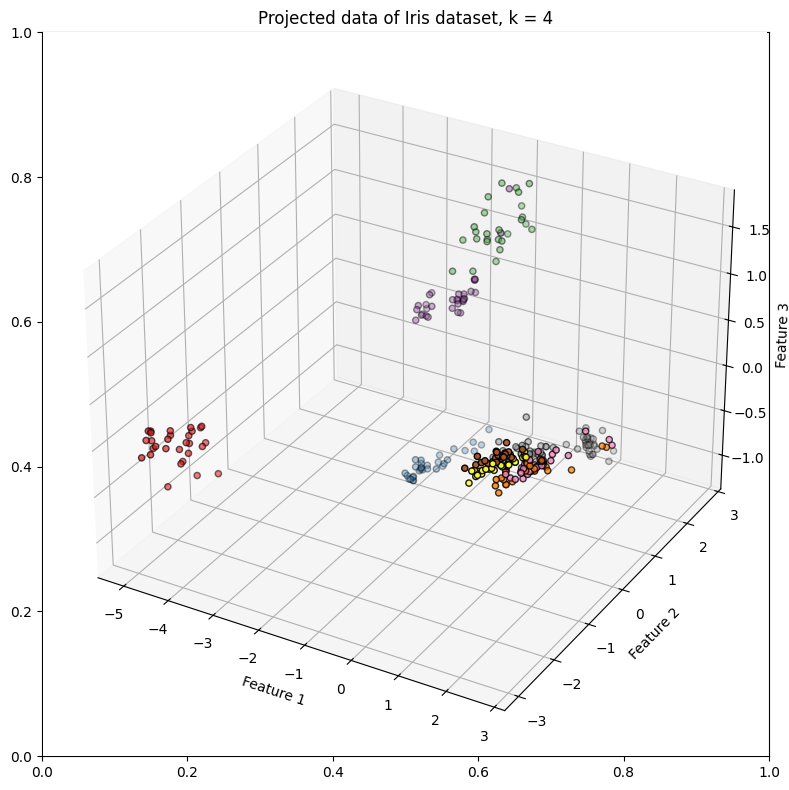

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=labels,  cmap=plt.cm.Set1, edgecolor="k")

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')


plt.title(f'Projected data of Iris dataset, k = {k}')
plt.tight_layout()
plt.show()

### Nutrients of pizzas dataset

In [14]:
df = pd.read_csv('../../data/Pizza.csv')

df.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [15]:
X_df = df.drop(labels=['brand','id'], axis=1)
X = X_df.values
y = df.brand

classes = y.unique().tolist()
labels = [classes.index(classe) for classe in y]

In [16]:
n_features = X.shape[1] # Number of features

print('Number of examples', X.shape[0])
print('Number of features', n_features)
print('Labels:', np.unique(labels))

Number of examples 300
Number of features 7
Labels: [0 1 2 3 4 5 6 7 8 9]


In [17]:
k = 4 # Number of components

# Feature normalization
fn = FeatureNormalize()
fn.fit(X)

X_norm = fn.transform(X)

# Principal Component Analysis
pca = PCA(k)
pca.fit(X_norm)

Z = pca.transform(X_norm)
S = pca.S

In [18]:
k_range = n_features-1
variance_ratio = cumulativeExplainedVariance(S, k_range)

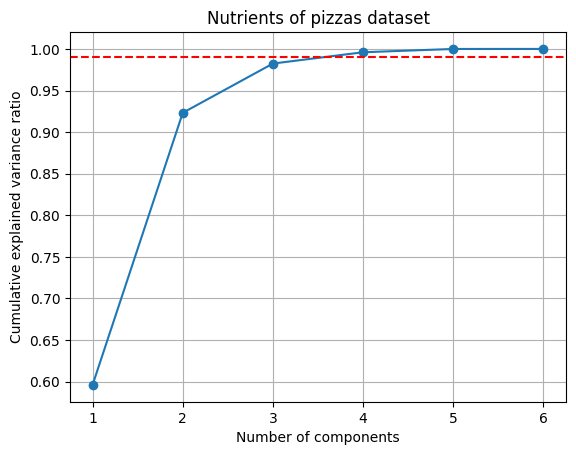

In [19]:
threshold = 0.99 # Threshold of explained variance

n_components = np.arange(1, n_features)

plt.plot(n_components, variance_ratio, marker='o')
plt.axhline(threshold, color='r', linestyle='--')
plt.grid()
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Nutrients of pizzas dataset')
plt.show()

In [20]:
curr_ratio = variance_ratio[variance_ratio >= threshold][0]
curr_component = n_components[variance_ratio == curr_ratio][0]

print('k = %d is the smallest value of k with cumulative explained variance ratio of %.4f, which  is higher than the threshold of %.2f' %
      (curr_component, curr_ratio, threshold))

k = 4 is the smallest value of k with cumulative explained variance ratio of 0.9960, which  is higher than the threshold of 0.99


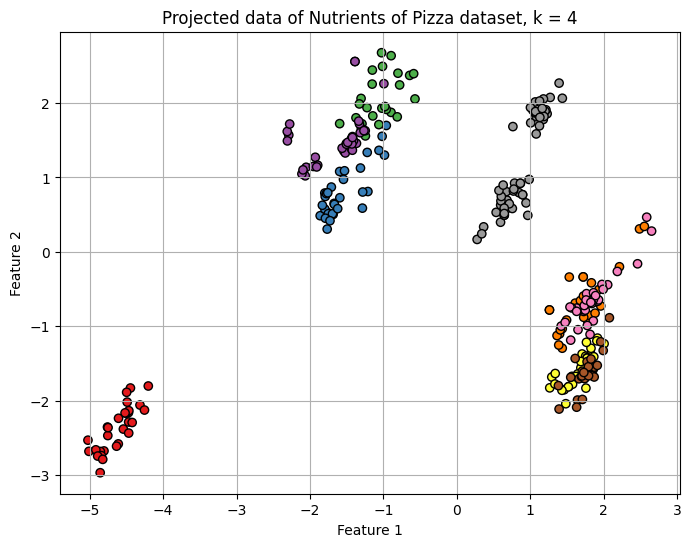

In [21]:
plt.figure(2, figsize=(8, 6))
plt.clf()

scatter = plt.scatter(Z[:, 0], Z[:, 1], c=labels, cmap=plt.cm.Set1, edgecolor="k")
plt.grid()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f'Projected data of Nutrients of Pizza dataset, k = {k}')
plt.show()

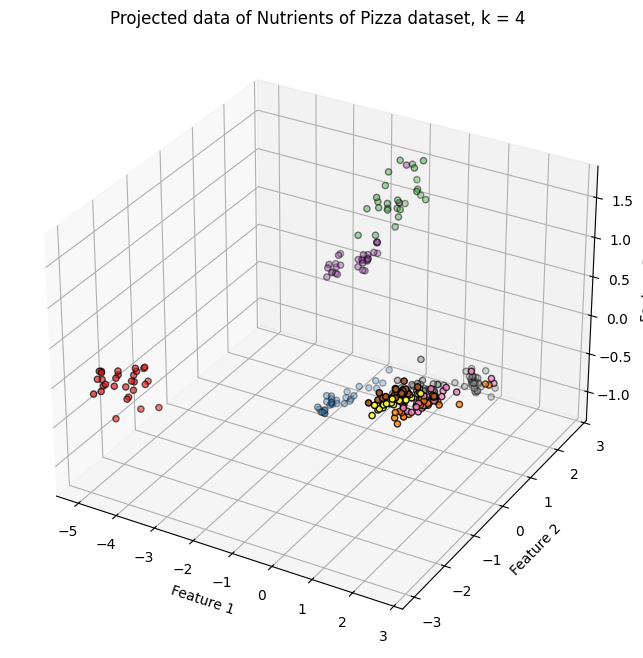

In [22]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

ax.scatter(Z[:,0], Z[:,1], Z[:,2], c=labels,  cmap=plt.cm.Set1, edgecolor="k")

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

plt.title(f'Projected data of Nutrients of Pizza dataset, k = {4}')
plt.show()